### 1. What is Boosting in Machine Learning?
Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) to form a strong learner. It works by training models sequentially, where each new model focuses on correcting the errors made by the previous ones.

---

### 2. How does Boosting differ from Bagging?
- **Boosting** builds models sequentially, with each model correcting the mistakes of the previous ones.
- **Bagging** builds models independently in parallel and combines their outputs (like voting or averaging).
- Boosting focuses on bias reduction, while bagging focuses on variance reduction.

---

### 3. What is the key idea behind AdaBoost?
The key idea behind AdaBoost (Adaptive Boosting) is to assign more weight to misclassified samples so that the next weak learner focuses more on those difficult cases. The final prediction is a weighted majority vote (or sum) of all the weak learners.

---

### 4. Explain the working of AdaBoost with an example.
**Working of AdaBoost:**
1. Start with equal weights for all training samples.
2. Train a weak learner (e.g., decision stump).
3. Increase weights of misclassified samples.
4. Train the next weak learner on the updated weights.
5. Repeat for a number of rounds.
6. Combine the weak learners with weighted votes.

**Example:**
- Suppose we have 3 learners.
- Learner 1 misclassifies sample A → increase weight of A.
- Learner 2 focuses more on A but misclassifies B → increase B’s weight.
- Learner 3 focuses on B, does well.
- Final prediction is a weighted combination of all 3 learners.

---

### 5. What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting is another boosting method where each new model is trained to minimize the **residual errors** (gradients of the loss function) of the previous model using gradient descent.

**Difference from AdaBoost:**
- AdaBoost uses exponential loss and reweights samples.
- Gradient Boosting directly optimizes a loss function (like MSE or Log Loss) using gradient descent.

---

### 6. What is the loss function in Gradient Boosting?
The loss function depends on the task:
- **Regression:** Mean Squared Error (MSE) or Mean Absolute Error (MAE)
- **Classification:** Log Loss (Binary Cross-Entropy)

Gradient Boosting minimizes this loss function by fitting new models to the negative gradient of the loss.

---

### 7. How does XGBoost improve over traditional Gradient Boosting?
XGBoost (Extreme Gradient Boosting) adds several improvements:
- **Regularization** to prevent overfitting
- **Parallelization** for faster computation
- **Handling missing values** natively
- **Tree pruning** using max depth
- **Sparsity-aware learning** and optimized memory usage

---

### 8. What is the difference between XGBoost and CatBoost?
- **XGBoost** requires preprocessing of categorical features (e.g., one-hot encoding).
- **CatBoost** handles categorical variables natively using "ordered boosting" and statistical encoding.
- **CatBoost** is more efficient and accurate for datasets with many categorical features.

---

### 9. What are some real-world applications of Boosting techniques?
- Fraud detection
- Credit scoring and risk modeling
- Recommender systems
- Medical diagnosis
- Customer churn prediction
- Click-through rate (CTR) prediction
- Image and text classification

---

### 10. How does regularization help in XGBoost?
Regularization (L1 and L2) in XGBoost:
- Prevents overfitting by penalizing complex models
- Shrinks feature weights to encourage simpler models
- Adds a regularization term to the objective function (like Lasso and Ridge)

---

### 11. What are some hyperparameters to tune in Gradient Boosting models?
- `learning_rate`: step size for updating predictions
- `n_estimators`: number of boosting rounds
- `max_depth`: maximum depth of trees
- `min_samples_split`: minimum samples to split a node
- `subsample`: fraction of data used per tree
- `colsample_bytree`: fraction of features used per tree
- `regularization_alpha` (L1) and `regularization_lambda` (L2)

---

### 12. What is the concept of Feature Importance in Boosting?
Feature importance refers to how useful or valuable each feature was in constructing the boosted decision trees. It is often measured by:
- Frequency of feature used in splits
- Average gain or reduction in loss when using the feature

---

### 13. Why is CatBoost efficient for categorical data?
CatBoost is efficient for categorical data because:
- It handles categorical variables natively using **target statistics** and **ordered boosting** to avoid data leakage.
- It reduces the need for manual preprocessing (like one-hot encoding), making it fast and accurate on real-world datasets with many categorical features.


In [1]:
# 1. Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = AdaBoostClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.9366666666666666


In [2]:
# 2. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = AdaBoostRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))


MAE: 96.46528173410456


In [3]:
# 3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
model = GradientBoostingClassifier()
model.fit(X, y)
importances = model.feature_importances_
for name, importance in zip(data.feature_names, importances):
    print(f"{name}: {importance:.4f}")


mean radius: 0.0000
mean texture: 0.0276
mean perimeter: 0.0007
mean area: 0.0003
mean smoothness: 0.0001
mean compactness: 0.0018
mean concavity: 0.0029
mean concave points: 0.1287
mean symmetry: 0.0005
mean fractal dimension: 0.0005
radius error: 0.0012
texture error: 0.0038
perimeter error: 0.0018
area error: 0.0090
smoothness error: 0.0008
compactness error: 0.0091
concavity error: 0.0075
concave points error: 0.0041
symmetry error: 0.0023
fractal dimension error: 0.0010
worst radius: 0.4147
worst texture: 0.0347
worst perimeter: 0.1725
worst area: 0.0379
worst smoothness: 0.0070
worst compactness: 0.0007
worst concavity: 0.0134
worst concave points: 0.1103
worst symmetry: 0.0033
worst fractal dimension: 0.0018


In [4]:
# 4. Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("R2 Score:", r2_score(y_test, preds))


R2 Score: 0.8681192746177961


In [7]:
# 5. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Re-generate classification data as the previous cells might have overwritten X, y, X_train, y_train
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


model_xgb = XGBClassifier(eval_metric='logloss')
model_xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, model_xgb.predict(X_test)))
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, model_gb.predict(X_test)))

XGBoost Accuracy: 0.8566666666666667
Gradient Boosting Accuracy: 0.8566666666666667


In [8]:
# Install catboost if not already installed
!pip install catboost

# 6. Train a CatBoost Classifier and evaluate using F1-Score
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("F1 Score:", f1_score(y_test, preds))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00
F1 Score: 0.8835820895522388


In [9]:
# 7. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, preds))


MSE: 0.11976923793554306


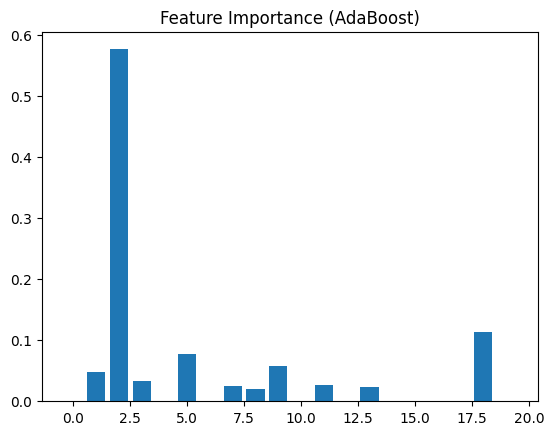

In [10]:
# 8. Train an AdaBoost Classifier and visualize feature importance
import matplotlib.pyplot as plt
model = AdaBoostClassifier()
model.fit(X_train, y_train)
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("Feature Importance (AdaBoost)")
plt.show()


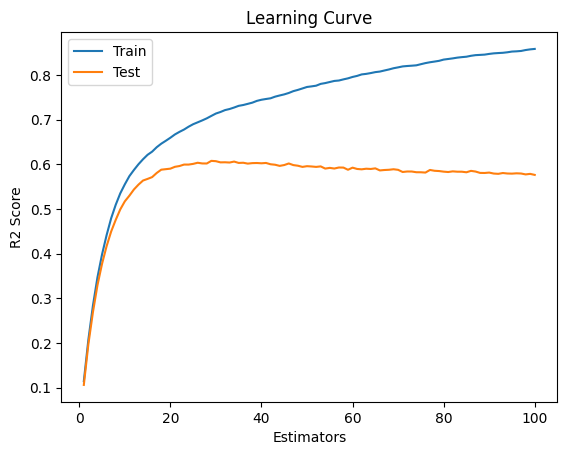

In [11]:
# 9. Train a Gradient Boosting Regressor and plot learning curves
import numpy as np
train_scores = []
test_scores = []
for i in range(1, 101):
    model = GradientBoostingRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(range(1, 101), train_scores, label='Train')
plt.plot(range(1, 101), test_scores, label='Test')
plt.xlabel("Estimators")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Learning Curve")
plt.show()


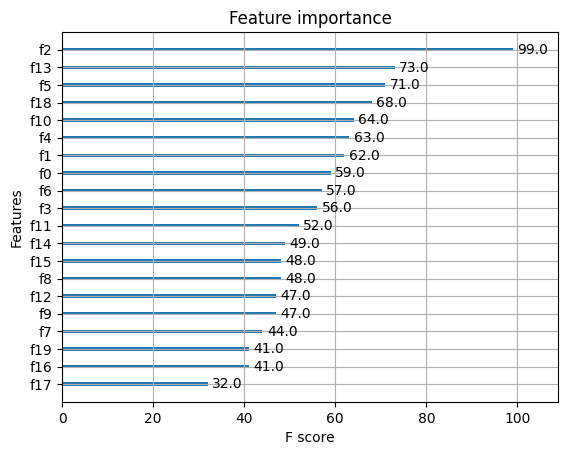

In [12]:
# 10. Train an XGBoost Classifier and visualize feature importance
from xgboost import plot_importance
model = XGBClassifier()
model.fit(X_train, y_train)
plot_importance(model)
plt.show()


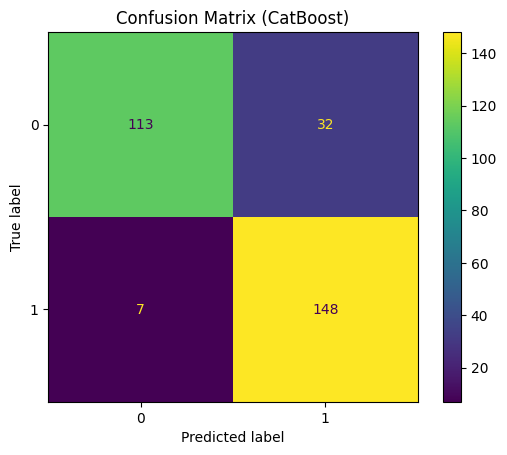

In [13]:
# 11. Train a CatBoost Classifier and plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix (CatBoost)")
plt.show()


In [14]:
# 12. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
estimators = [10, 50, 100, 200]
for n in estimators:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"n_estimators={n}, Accuracy={acc:.4f}")


n_estimators=10, Accuracy=0.8533
n_estimators=50, Accuracy=0.8467
n_estimators=100, Accuracy=0.8567
n_estimators=200, Accuracy=0.8400


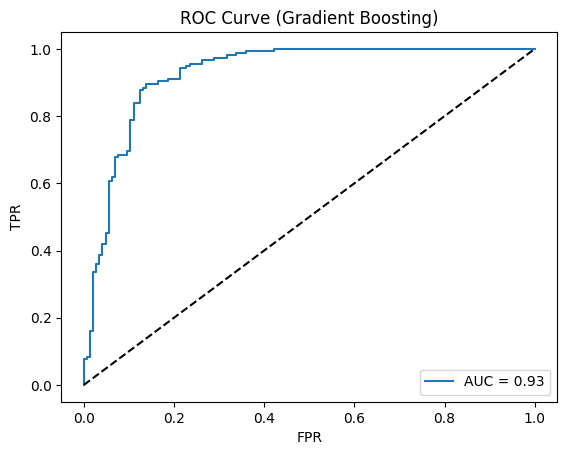

In [15]:
# 13. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.metrics import roc_curve, auc

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve (Gradient Boosting)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()


In [16]:
# 14. Train an XGBoost Regressor and tune the learning rate using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01, 0.1, 0.3]}
grid = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best learning rate:", grid.best_params_['learning_rate'])
print("Best Score:", grid.best_score_)


Best learning rate: 0.01
Best Score: 0.41447625557581586


In [17]:
# 15. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_no_weight = CatBoostClassifier(verbose=0)
model_no_weight.fit(X_train, y_train)
print("No weight F1:", f1_score(y_test, model_no_weight.predict(X_test)))

model_weighted = CatBoostClassifier(class_weights=[1, 10], verbose=0)
model_weighted.fit(X_train, y_train)
print("Weighted F1:", f1_score(y_test, model_weighted.predict(X_test)))


No weight F1: 0.8059701492537313
Weighted F1: 0.8493150684931506


In [18]:
# 16. Train an AdaBoost Classifier and analyze the effect of different learning rates
rates = [0.01, 0.1, 1]
for lr in rates:
    model = AdaBoostClassifier(learning_rate=lr)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Learning rate={lr}, Accuracy={acc:.4f}")


Learning rate=0.01, Accuracy=0.8700
Learning rate=0.1, Accuracy=0.8833
Learning rate=1, Accuracy=0.9167


In [19]:
# 17. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss
from sklearn.datasets import load_digits
from sklearn.metrics import log_loss

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = XGBClassifier(objective='multi:softprob', num_class=10, eval_metric='mlogloss')
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))


Log Loss: 0.16163883484075736
